---
---
### UNaB: Universidad Nacional Guillermo Brown
#### Inferencia estadística y reconocimiento de patrones
#### Parcial N°1 - 22/10/2024
##### Prof: Sebastian Simondi
# Alumnos : Lucas León González - David Lobos - Euler Diego
----
----

## Actividades

1. Aplicar todos los algoritmos de clasificación estudiados.
2. Calcular sus métricas y matrices de confusión.
3. Determinar si existe uno que sea mucho mejor que los demás.



---
---
## Modelo de predicción de crédito de préstamos
---
---

El análisis del dataset Clasificación_banco.csv tiene como objetivo desarrollar y evaluar un modelo predictivo para determinar la probabilidad de que un cliente no pague un préstamo en su totalidad. Este dataset incluye 9578 observaciones y 14 variables, abarcando desde la política crediticia hasta variables financieras y demográficas.

#### Descripción del Dataset
-
El dataset está compuesto por las siguientes columnas:

* política_crediticia: (int) Indicador de la política de crédito aplicada.
* propósito: (object) Propósito del préstamo.
* tasa_interés: (float64) Tasa de interés del préstamo.
* cuota: (float64) Cuota mensual del préstamo.
* ingreso_anual_log: (float64) Logaritmo del ingreso anual del cliente.
* dti: (float64) Relación deuda-ingreso.
* fico: (int) Puntaje FICO del cliente.
* días_con_linea_credito: (float64) Días con una línea de crédito abierta.
* saldo_revolvente: (int64) Saldo revolvente en cuentas de crédito.
* utilización_revolvente: (float64) Porcentaje de utilización del crédito  revolvente.
* consultas_últimos_6_meses: (int64) Número de consultas de crédito en los últimos 6 meses.
* moras_2_años: (int64) Número de moras en los últimos 2 años.
* registro_publico: (int64) Indicador de registro público de morosidad.
* no_pagado_completo: (int64) Variable objetivo que indica si el préstamo no se pagó en su totalidad (1: no pagado, 0: pagado).

----
----


###            Ingesta y limpieza de datos

---



---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# Configuración de estilo
sns.set(style='whitegrid')

In [4]:
# CARGAR LOS DATOS EN EL DATAFRAME
df = pd.read_csv('Claseficación_banco.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
# REVISAR LOS TIPOS DE DATOS
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [8]:
# Eliminar los duplicados
print(f'Original: {df.count()} filas') #conteo de duplicados
duplicate_rows_df =df[df.duplicated()] # genero un set de datos con todos los datos que hay duplicados
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.count()}')  #deteco que el ID esta repetido en 18 casos

# Eliminar los duplicados
df = df.drop_duplicates()

Original: credit.policy        9578
purpose              9578
int.rate             9578
installment          9578
log.annual.inc       9578
dti                  9578
fico                 9578
days.with.cr.line    9578
revol.bal            9578
revol.util           9578
inq.last.6mths       9578
delinq.2yrs          9578
pub.rec              9578
not.fully.paid       9578
dtype: int64 filas
Cantidad de filas duplicadas: credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [9]:
#Conteo Filas despues de eliminar los duplicados
print(f'Original: {df.count()} filas')

Original: credit.policy        9578
purpose              9578
int.rate             9578
installment          9578
log.annual.inc       9578
dti                  9578
fico                 9578
days.with.cr.line    9578
revol.bal            9578
revol.util           9578
inq.last.6mths       9578
delinq.2yrs          9578
pub.rec              9578
not.fully.paid       9578
dtype: int64 filas


In [10]:
# ELIMINAR LOS VALORES PERDIDOS O NULOS  sin datos
#Encontrar los valores nulos
print(df.isnull().sum())

#Eliminar los valores perdidos
df = df.dropna()
print()

#Despues de eliminar los nulos
print(df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [11]:
# # Convertir las variables categóricas en numéricas (encoding)
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [12]:
# Renombrar las columnas al español
df = df.rename(columns={
    'credit.policy': 'política_crediticia',
    'purpose': 'propósito',
    'int.rate': 'tasa_interés',
    'installment': 'cuota',
    'log.annual.inc': 'ingreso_anual_log',
    'dti': 'dti',
    'fico': 'fico',
    'days.with.cr.line': 'días_con_linea_credito',
    'revol.bal': 'saldo_revolvente',
    'revol.util': 'utilización_revolvente',
    'inq.last.6mths': 'consultas_últimos_6_meses',
    'delinq.2yrs': 'moras_2_años',
    'pub.rec': 'registro_publico',
    'not.fully.paid': 'no_pagado_completo'
})
# Mostrar las primeras filas del dataframe para confirmar
print(df.head())

   política_crediticia  tasa_interés   cuota  ingreso_anual_log    dti  fico  \
0                    1        0.1189  829.10          11.350407  19.48   737   
1                    1        0.1071  228.22          11.082143  14.29   707   
2                    1        0.1357  366.86          10.373491  11.63   682   
3                    1        0.1008  162.34          11.350407   8.10   712   
4                    1        0.1426  102.92          11.299732  14.97   667   

   días_con_linea_credito  saldo_revolvente  utilización_revolvente  \
0             5639.958333             28854                    52.1   
1             2760.000000             33623                    76.7   
2             4710.000000              3511                    25.6   
3             2699.958333             33667                    73.2   
4             4066.000000              4740                    39.5   

   consultas_últimos_6_meses  moras_2_años  registro_publico  \
0                          0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   política_crediticia         9578 non-null   int64  
 1   tasa_interés                9578 non-null   float64
 2   cuota                       9578 non-null   float64
 3   ingreso_anual_log           9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   días_con_linea_credito      9578 non-null   float64
 7   saldo_revolvente            9578 non-null   int64  
 8   utilización_revolvente      9578 non-null   float64
 9   consultas_últimos_6_meses   9578 non-null   int64  
 10  moras_2_años                9578 non-null   int64  
 11  registro_publico            9578 non-null   int64  
 12  no_pagado_completo          9578 non-null   int64  
 13  purpose_credit_card         9578 

In [14]:
df

,política_crediticia,tasa_interés,cuota,ingreso_anual_log,dti,fico,días_con_linea_credito,saldo_revolvente,utilización_revolvente,consultas_últimos_6_meses,moras_2_años,registro_publico,no_pagado_completo,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,False,False,False,False,False,False
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,False,False,False,False,False,False
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,False,True,False,False,False,False
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,False,False,False,True,False,False


----
----
### Análisis Exploratorio de Datos (EDA)
----

## Análisis Estadístico del Comportamiento de Pago en Préstamos


In [15]:
df.describe()

,política_crediticia,tasa_interés,cuota,ingreso_anual_log,dti,fico,días_con_linea_credito,saldo_revolvente,utilización_revolvente,consultas_últimos_6_meses,moras_2_años,registro_publico,no_pagado_completo
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


       política_crediticia  tasa_interés        cuota  ingreso_anual_log  \
count          9578.000000   9578.000000  9578.000000        9578.000000   
mean              0.804970      0.122640   319.089413          10.932117   
std               0.396245      0.026847   207.071301           0.614813   
min               0.000000      0.060000    15.670000           7.547502   
25%               1.000000      0.103900   163.770000          10.558414   
50%               1.000000      0.122100   268.950000          10.928884   
75%               1.000000      0.140700   432.762500          11.291293   
max               1.000000      0.216400   940.140000          14.528354   

               dti         fico  días_con_linea_credito  saldo_revolvente  \
count  9578.000000  9578.000000             9578.000000      9.578000e+03   
mean     12.606679   710.846314             4560.767197      1.691396e+04   
std       6.883970    37.970537             2496.930377      3.375619e+04   
min    

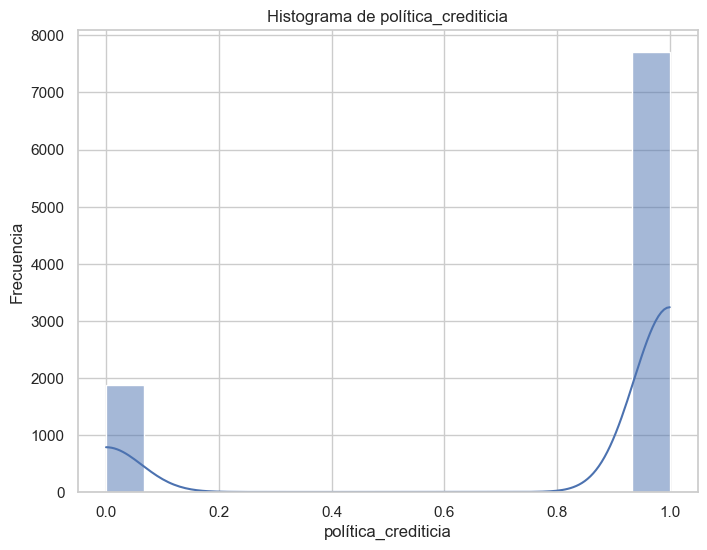

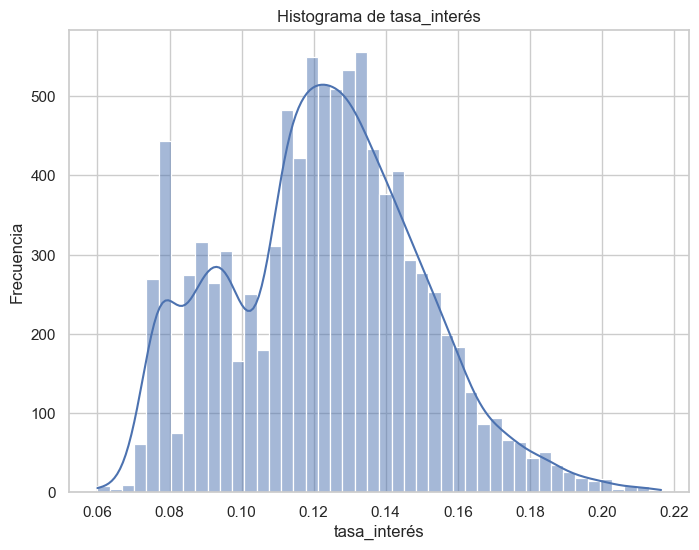

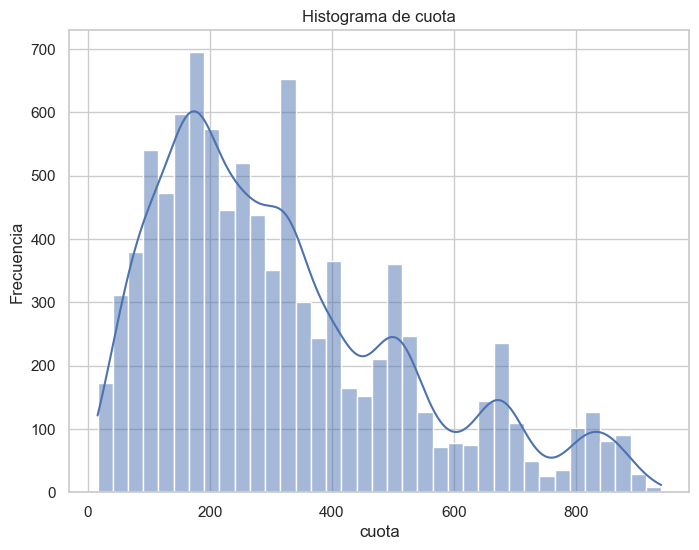

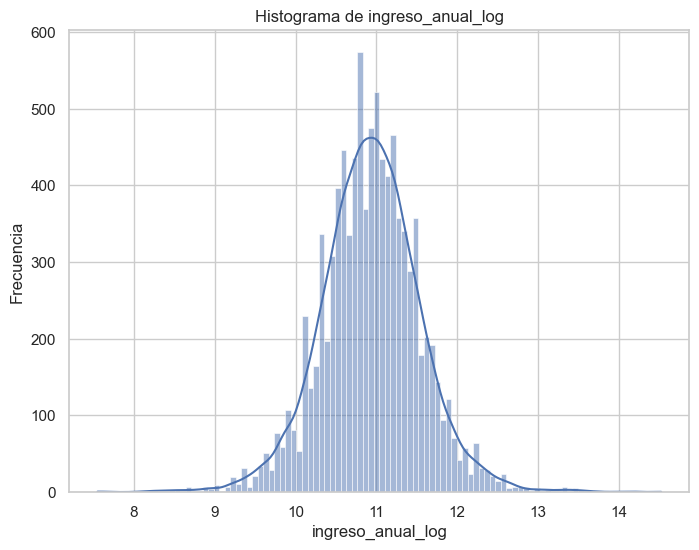

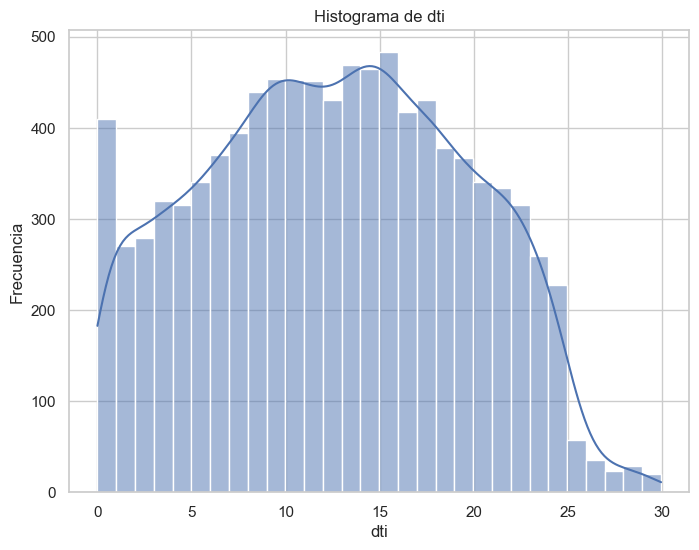

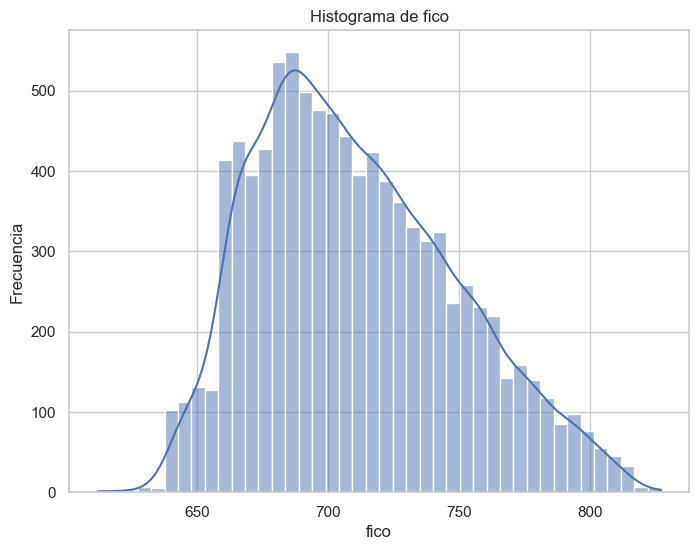

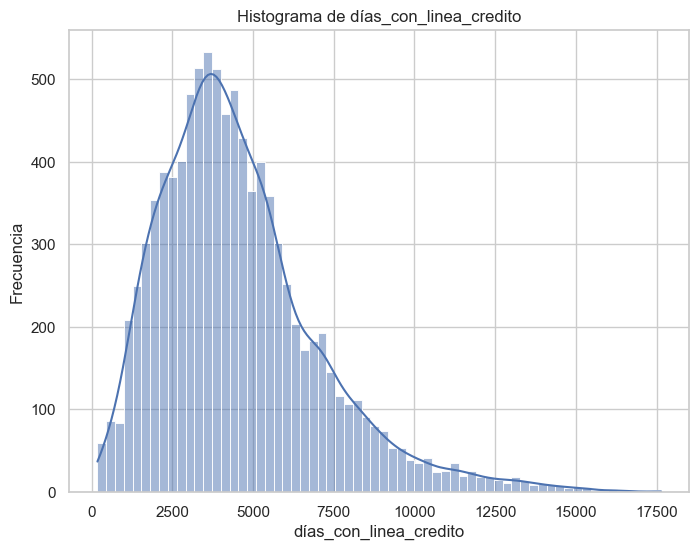

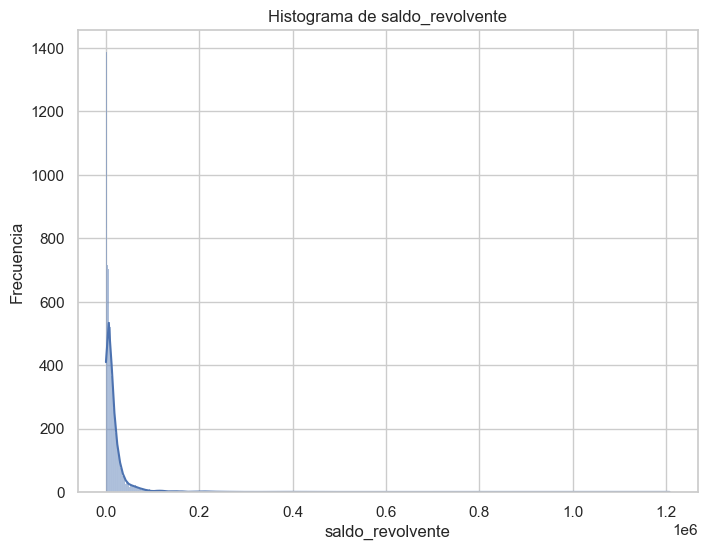

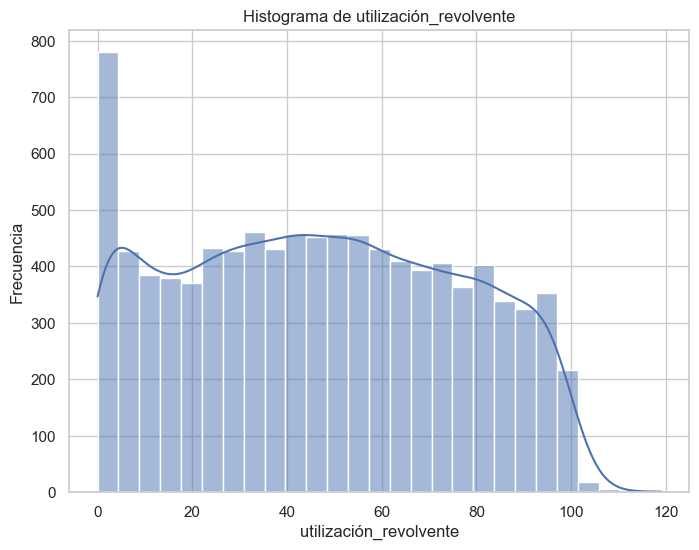

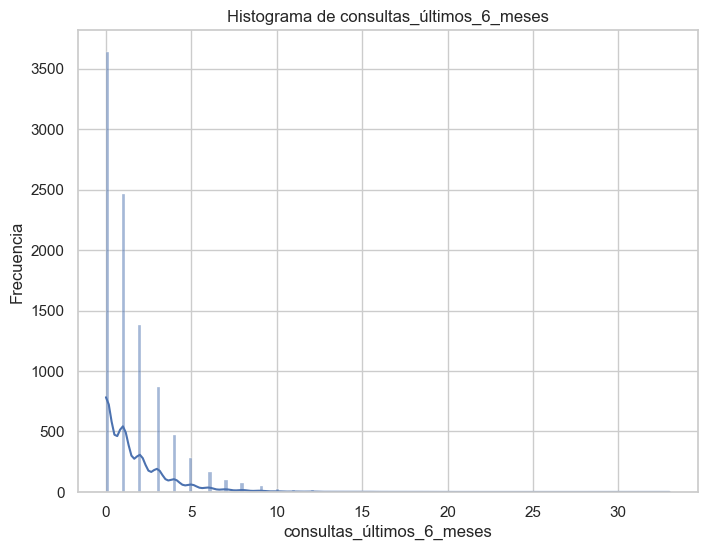

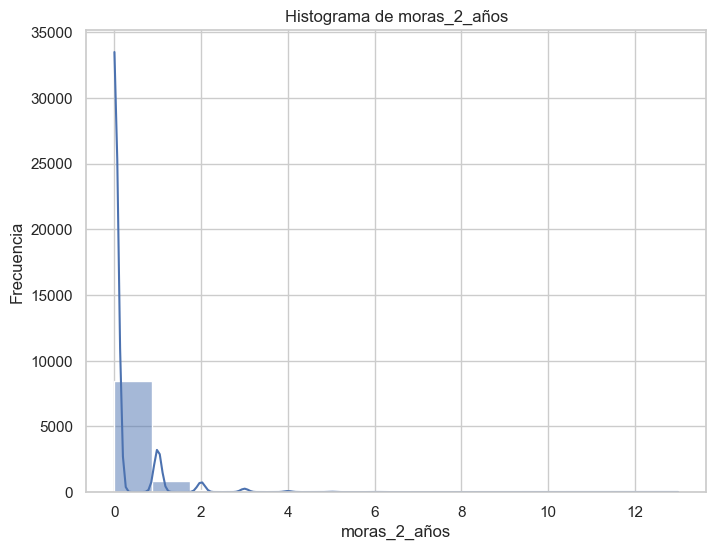

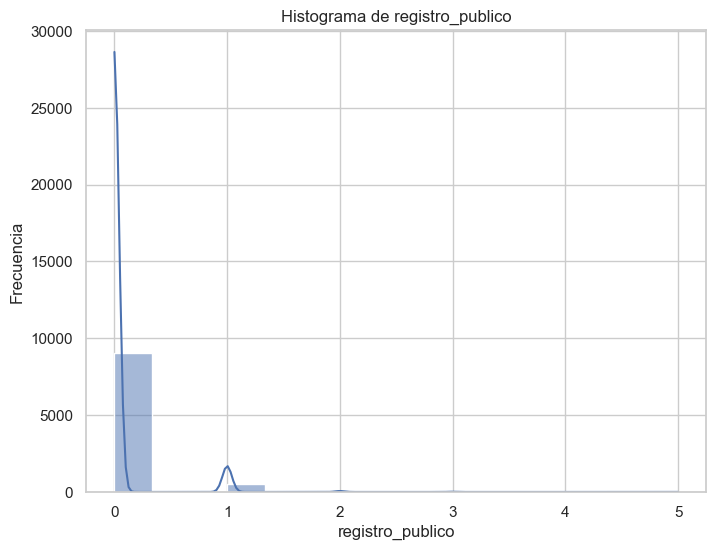

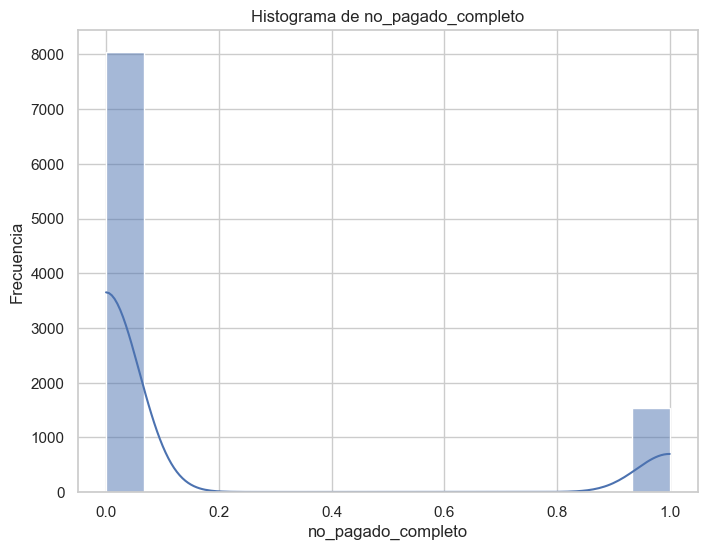

In [16]:

# Descripción estadística de las variables numéricas
print(df.describe())

# Histogramas de las variables numéricas
for column in df.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f'Histograma de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')
  plt.show()



### 1. Política Crediticia
- **Descripción:** La columna `política_crediticia` tiene un promedio de **0.80**, lo que indica que la mayoría de los préstamos se otorgan bajo políticas crediticias relativamente favorables.
- **Rango:** La política puede variar de **0** (no favorable) a **1** (favorable), con la mayoría de los datos en el rango superior.

### 2. Tasa de Interés
- **Promedio:** La tasa de interés promedio es de **12.26%** (valor de `tasa_interés`), lo que podría ser considerado moderado.
- **Rango:** Las tasas varían desde un mínimo de **6.00%** hasta un máximo de **21.64%**, lo que sugiere que hay una variedad significativa en la tasa de interés de los préstamos ofrecidos.

### 3. Cuota Mensual
- **Promedio:** La cuota mensual promedio de los préstamos es de **319.09**, con una gran dispersión (desviación estándar de **207.07**), indicando que algunas cuotas son significativamente más altas que otras.
- **Rango:** Las cuotas van desde **15.67** hasta **940.14**, lo que sugiere que hay préstamos con cuotas accesibles y otros mucho más altos.

### 4. Ingreso Anual Log
- **Promedio:** El ingreso anual logarítmico (`ingreso_anual_log`) tiene un promedio de **10.93**, lo que indica un ingreso anual promedio en el rango medio a alto.
- **Rango:** Los valores van desde **7.55** a **14.53**, reflejando una diversidad en los niveles de ingresos de los clientes.

### 5. Relación Deuda-Ingreso (DTI)
- **Promedio:** La relación deuda-ingreso promedio es de **12.61**, lo que sugiere que, en promedio, los clientes tienen un nivel de deuda manejable en relación con su ingreso.
- **Rango:** Se observa una variabilidad considerable, con un mínimo de **0.00** y un máximo de **29.96**.

### 6. Puntaje FICO
- **Promedio:** El puntaje FICO promedio es de **710.85**, lo que indica que, en general, los clientes tienen un buen historial crediticio.
- **Rango:** Los puntajes varían desde **612** (bajo) hasta **827** (muy alto).

### 7. Días con Línea de Crédito
- **Promedio:** En promedio, los clientes han tenido una línea de crédito abierta por **4560.77 días** (aproximadamente 12.5 años).
- **Rango:** La duración varía desde **179.96 días** hasta **17639.96 días**, lo que sugiere que algunos clientes son nuevos en el crédito mientras que otros tienen una larga historia.

### 8. Saldo Revolvente
- **Promedio:** El saldo promedio en cuentas de crédito es de **16,913.96**, con una gran variabilidad (desviación estándar de **33,756.19**).
- **Rango:** Los saldos varían de **0.00** a **1,207,359.00**, indicando que algunos clientes tienen deudas significativas.

### 9. Utilización Revolvente
- **Promedio:** La utilización promedio de crédito revolvente es de **46.80%**, lo que indica que, en promedio, los clientes utilizan casi la mitad de su crédito disponible.
- **Rango:** Hay un rango amplio de utilización, desde **0.00%** hasta **119.00%**, lo que podría indicar que algunos clientes superan su límite de crédito.

### 10. Consultas de Crédito
- **Promedio:** En promedio, los clientes han tenido **1.58 consultas** en los últimos 6 meses.
- **Rango:** Hay clientes que no han tenido consultas (0) hasta un máximo de **33**.

### 11. Moras en 2 Años
- **Promedio:** En promedio, los clientes tienen **0.16** moras en los últimos 2 años, lo que sugiere que la mayoría de los clientes están cumpliendo con sus pagos.
- **Rango:** Desde **0** hasta **13** moras, indicando que hay clientes con problemas de pago.

### 12. Registro Público
- **Promedio:** Hay un promedio de **0.06** en la columna `registro_publico`, lo que indica pocos problemas legales relacionados con los créditos.
- **Rango:** Desde **0** hasta **5**, mostrando casos extremos.

### 13. Variable Objetivo: No Pagado Completo
- **Promedio:** El **16.01%** de los préstamos no se han pagado completamente, lo que representa un desafío significativo para la entidad crediticia.
- **Rango:** La variable objetivo toma valores de **0** (pagado) y **1** (no pagado), con un bajo porcentaje de incumplimiento.





---
## Análisis de la Distribución del Estado de Pago del Préstamo

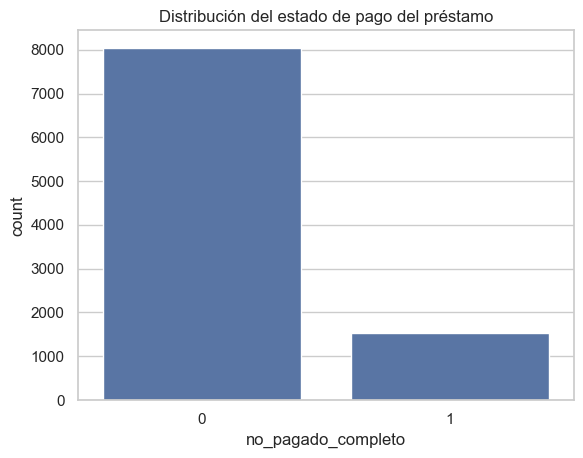

In [17]:
# Verificar la distribución de la variable objetivo
sns.countplot(x='no_pagado_completo', data=df)
plt.title('Distribución del estado de pago del préstamo')
plt.show()



### Categoría 0:
- La categoría **0** representa los préstamos que **sí fueron pagados completamente**.
- El conteo de préstamos en esta categoría es aproximadamente **8000**, lo que indica que la mayoría de los préstamos fueron liquidados en su totalidad.

### Categoría 1:
- La categoría **1** agrupa los préstamos que **no fueron pagados completamente**.
- Se observan alrededor de **1000 préstamos** en esta categoría, que es significativamente menor en comparación con la categoría de préstamos pagados.



---
## Análisis de la Matriz de Correlación

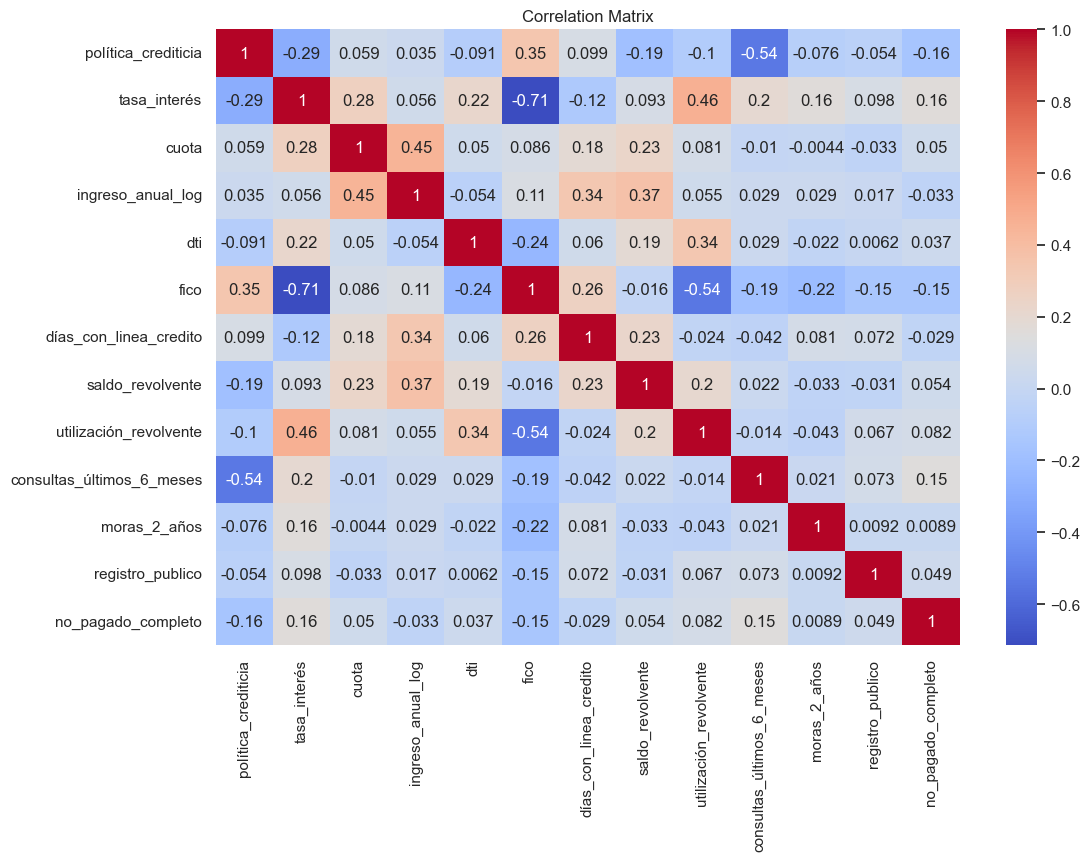

In [18]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




## Principales Correlaciones:

1. **FICO y tasa de interés (-0.71)**:
   - Existe una fuerte correlación negativa entre el **puntaje FICO** y la **tasa de interés**. A mayor puntaje FICO, menor es la tasa de interés, lo cual es un comportamiento esperable en análisis crediticio.

2. **Consultas de crédito en los últimos 6 meses y FICO (-0.54)**:
   - Hay una fuerte correlación negativa entre el número de **consultas de crédito recientes** y el **puntaje FICO**. Más consultas parecen asociarse con un puntaje FICO más bajo.

3. **Utilización de la línea de crédito y saldo revolvente (0.54)**:
   - La **utilización de la línea de crédito** tiene una fuerte correlación positiva con el **saldo revolvente**: un mayor uso de la línea de crédito está vinculado a un saldo pendiente mayor.

4. **Cuota e ingreso anual (0.45)**:
   - Existe una correlación positiva moderada entre el **ingreso anual** y la **cuota** del préstamo. Esto indica que personas con mayores ingresos tienden a tener préstamos con cuotas más altas.

5. **Política crediticia y FICO (0.35)**:
   - Hay una correlación positiva entre la **política crediticia** y el **puntaje FICO**, lo que puede reflejar que aquellos con mejores puntajes FICO cumplen más con los requisitos de la política crediticia.

## Variable de Interés: **no_pagado_completo**
- **Tasa de interés (0.16)**: Correlación positiva moderada, sugiriendo que una tasa de interés más alta está levemente asociada con un mayor riesgo de no completar el pago.
- **Política crediticia (-0.16)**: Relación negativa débil, lo que indica que políticas crediticias más estrictas están asociadas con una menor probabilidad de impago.
- **Utilización revolvente (0.15)**: Correlación positiva ligera, sugiriendo que un mayor uso de la línea de crédito puede estar vinculado a un riesgo ligeramente mayor de no completar el pago.

## Conclusiones:
- Las correlaciones más fuertes son consistentes con lo que se espera en un análisis crediticio, como la relación entre el puntaje FICO y la tasa de interés, o el uso de la línea de crédito y el saldo revolvente.
- Las correlaciones con **no_pagado_completo** son relativamente débiles, lo que sugiere que las variables incluidas no tienen un impacto fuerte individualmente en la capacidad de pago, o que puede haber factores adicionales no considerados en este análisis.




----
## Implementacion de los Algoritmos de Clasificación .
----
----

In [19]:
# Dividir el dataset en características (X) y etiquetas (y)
X = df.drop('no_pagado_completo', axis=1)
y = df['no_pagado_completo']


In [20]:
# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Escalar los datos (normalización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


----

## Clasificador Bayesiano Ingenuo:

Clasificador Bayesiano Ingenuo:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1611
           1       0.29      0.09      0.14       305

    accuracy                           0.82      1916
   macro avg       0.57      0.52      0.52      1916
weighted avg       0.76      0.82      0.78      1916

Precisión: 0.8194154488517745


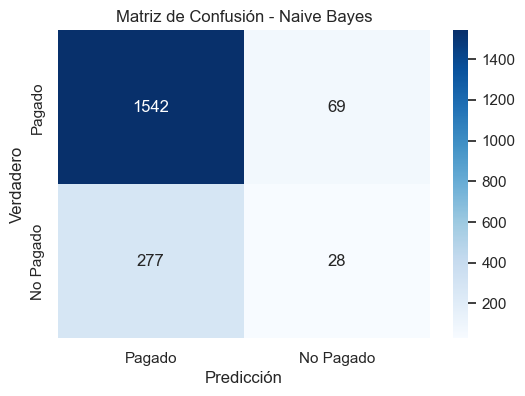

In [22]:
# Entrenar el modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_nb = nb_model.predict(X_test)

# Evaluar el modelo
print("Clasificador Bayesiano Ingenuo:")
print(classification_report(y_test, y_pred_nb))
print("Precisión:", accuracy_score(y_test, y_pred_nb))

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pagado', 'No Pagado'], yticklabels=['Pagado', 'No Pagado'])
    plt.title(f'Matriz de Confusión - {title}')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()

# Matriz de confusión para Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')

## Interpretación del Clasificador Bayesiano Ingenuo

### 1. Métricas de Evaluación
- **Precision:**
  - Para la clase **0 (pagado):** 0.85, lo que significa que el 85% de las predicciones de esta clase son correctas.
  - Para la clase **1 (no pagado):** 0.29, indicando que solo el 29% de las predicciones de esta clase son correctas.
  
- **Recall:**
  - Para la clase **0:** 0.96, lo que indica que el modelo identifica correctamente el 96% de los casos de la clase 0.
  - Para la clase **1:** 0.09, mostrando que el modelo solo identifica correctamente el 9% de los casos de la clase 1.

- **F1-score:**
  - Para la clase **0:** 0.90, lo que sugiere un buen equilibrio entre precision y recall.
  - Para la clase **1:** 0.14, bajo, indicando un pobre rendimiento en la identificación de esta clase.

- **Support:**
  - **0 (pagado):** 1611 es el número de instancias reales en esta clase.
  - **1 (no pagado):** 305 es el número de instancias reales en esta clase.

### 2. Exactitud (Accuracy)
- La exactitud general del modelo es **0.82**, lo que significa que el modelo clasifica correctamente el 82% de todas las instancias. Sin embargo, esta métrica puede ser engañosa en datasets desbalanceados.

### 3. Promedios (Macro y Weighted)
- **Macro Average:**
  - La media macro de precision (0.57), recall (0.52) y F1-score (0.52) muestra un rendimiento general sensible al desbalanceo de clases.

- **Weighted Average:**
  - La media ponderada de precision (0.76), recall (0.82) y F1-score (0.78) proporciona una mejor visión del rendimiento general considerando el soporte de cada clase.

### 4. Matriz de Confusión
- **Verdaderos Positivos (TP):** 1542 (predicciones correctas de la clase 0)
- **Falsos Positivos (FP):** 69 (predicciones incorrectas de la clase 0)
- **Falsos Negativos (FN):** 277 (predicciones incorrectas de la clase 1)
- **Verdaderos Negativos (TN):** 28 (predicciones correctas de la clase 1)

### 5. Interpretación General
El clasificador Bayesiano Ingenuo muestra un buen rendimiento general con una precisión del 82%. Sin embargo, su rendimiento en la identificación de la clase minoritaria (no pagado) es preocupante, con un recall del 9%. Esto indica que el modelo no está capturando bien los casos de incumplimiento, lo que es crítico en aplicaciones de riesgo crediticio.




----
## Clasificador Análisis del Discriminante Lineal:


Análisis del Discriminante Lineal:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1611
           1       0.44      0.05      0.08       305

    accuracy                           0.84      1916
   macro avg       0.64      0.52      0.50      1916
weighted avg       0.78      0.84      0.78      1916

Precisión: 0.8387265135699373


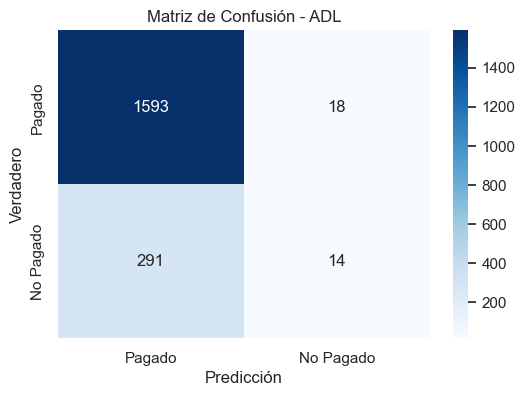

In [23]:
# Entrenar el modelo LDA
lda_model = LDA()
lda_model.fit(X_train_scaled, y_train)

# Hacer predicciones
#y_pred_lda = lda_model.predict(X_test)
y_pred_lda = lda_model.predict(X_test_scaled)

# Evaluar el modelo
print("\nAnálisis del Discriminante Lineal:")
print(classification_report(y_test, y_pred_lda))
print("Precisión:", accuracy_score(y_test, y_pred_lda))
# Matriz de confusión para ADL (Análisis Discriminante Lineal)
plot_confusion_matrix(y_test, y_pred_lda, 'ADL')


y_pred_lda = lda_model.predict(X_test_scaled)


## Interpretación del Análisis del Discriminante Lineal

### 1. Métricas de Evaluación
- **Precision:**
  - Para la clase **0 (pagado):** 0.85, lo que significa que el 85% de las predicciones de esta clase son correctas.
  - Para la clase **1 (no pagado):** 0.44, indicando que el 44% de las predicciones de esta clase son correctas.
  
- **Recall:**
  - Para la clase **0:** 0.99, lo que indica que el modelo identifica correctamente el 99% de los casos de la clase 0.
  - Para la clase **1:** 0.05, mostrando que el modelo solo identifica correctamente el 5% de los casos de la clase 1.

- **F1-score:**
  - Para la clase **0:** 0.91, lo que sugiere un buen equilibrio entre precision y recall.
  - Para la clase **1:** 0.08, bajo, indicando un pobre rendimiento en la identificación de esta clase.

- **Support:**
  - **0 (pagado):** 1611 es el número de instancias reales en esta clase.
  - **1 (no pagado):** 305 es el número de instancias reales en esta clase.

### 2. Exactitud (Accuracy)
- La exactitud general del modelo es **0.84**, lo que significa que el modelo clasifica correctamente el 84% de todas las instancias.

### 3. Promedios (Macro y Weighted)
- **Macro Average:**
  - La media macro de precision (0.64), recall (0.52) y F1-score (0.50) muestra un rendimiento general que es sensible al desbalanceo de clases.

- **Weighted Average:**
  - La media ponderada de precision (0.78), recall (0.84) y F1-score (0.78) proporciona una mejor visión del rendimiento general considerando el soporte de cada clase.

### 4. Matriz de Confusión
- **Verdaderos Positivos (TP):** 1593 (predicciones correctas de la clase 0)
- **Falsos Positivos (FP):** 18 (predicciones incorrectas de la clase 0)
- **Falsos Negativos (FN):** 291 (predicciones incorrectas de la clase 1)
- **Verdaderos Negativos (TN):** 14 (predicciones correctas de la clase 1)

### 5. Interpretación General
El análisis del Discriminante Lineal muestra un buen rendimiento general con una precisión del 84%. Sin embargo, el rendimiento en la identificación de la clase minoritaria (no pagado) es preocupante, con un recall del 5%. Esto sugiere que el modelo tiene dificultades para capturar los casos de incumplimiento, lo cual es crítico en aplicaciones de riesgo crediticio.



---
## Clasificador Análisis Discriminante Cuadrático


Análisis del Discriminante Cuadrático:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1611
           1       0.28      0.30      0.29       305

    accuracy                           0.76      1916
   macro avg       0.57      0.58      0.57      1916
weighted avg       0.77      0.76      0.77      1916

Precisión: 0.7640918580375783


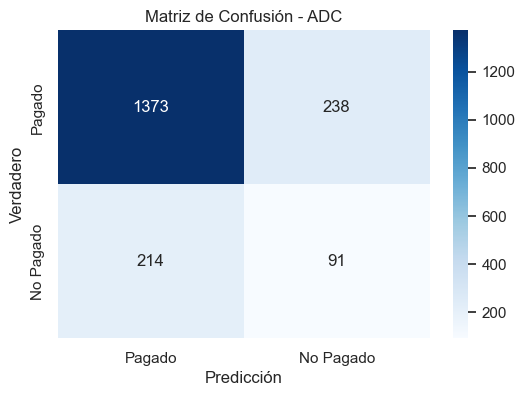

In [24]:
# Entrenar y evaluar el modelo ADC (Análisis Discriminante Cuadrático)
qda_model = QDA()
qda_model.fit(X_train_scaled, y_train)

# Hacer predicciones
#y_pred_qda = qda_model.predict(X_test)
y_pred_qda = qda_model.predict(X_test_scaled)

# Evaluar el modelo
print("\nAnálisis del Discriminante Cuadrático:")
print(classification_report(y_test, y_pred_qda))
print("Precisión:", accuracy_score(y_test, y_pred_qda))
# Matriz de confusión para ADC (Análisis Discriminante Cuadrático)
plot_confusion_matrix(y_test, y_pred_qda, 'ADC')


## Interpretación del  Análisis del Discriminante Cuadrático

### 1. Métricas de Evaluación
- **Precision:**
  - Para la clase **0 (pagado):** 0.87, lo que significa que el 87% de las predicciones de esta clase son correctas.
  - Para la clase **1 (no pagado):** 0.28, indicando que el 28% de las predicciones de esta clase son correctas.
  
- **Recall:**
  - Para la clase **0:** 0.85, lo que indica que el modelo identifica correctamente el 85% de los casos de la clase 0.
  - Para la clase **1:** 0.30, mostrando que el modelo identifica correctamente el 30% de los casos de la clase 1.

- **F1-score:**
  - Para la clase **0:** 0.86, lo que sugiere un buen equilibrio entre precision y recall.
  - Para la clase **1:** 0.29, bajo, indicando un rendimiento limitado en la identificación de esta clase.

- **Support:**
  - **0 (pagado):** 1611 es el número de instancias reales en esta clase.
  - **1 (no pagado):** 305 es el número de instancias reales en esta clase.

### 2. Exactitud (Accuracy)
- La exactitud general del modelo es **0.76**, lo que significa que el modelo clasifica correctamente el 76% de todas las instancias.

### 3. Promedios (Macro y Weighted)
- **Macro Average:**
  - La media macro de precision (0.57), recall (0.58) y F1-score (0.57) muestra un rendimiento general sensible al desbalanceo de clases.

- **Weighted Average:**
  - La media ponderada de precision (0.77), recall (0.76) y F1-score (0.77) proporciona una mejor visión del rendimiento general considerando el soporte de cada clase.

### 4. Matriz de Confusión
- **Verdaderos Positivos (TP):** 1373 (predicciones correctas de la clase 0)
- **Falsos Positivos (FP):** 238 (predicciones incorrectas de la clase 0)
- **Falsos Negativos (FN):** 214 (predicciones incorrectas de la clase 1)
- **Verdaderos Negativos (TN):** 91 (predicciones correctas de la clase 1)

### 5. Interpretación General
El análisis del Discriminante Cuadrático muestra un rendimiento aceptable con una precisión del 76%. Sin embargo, el rendimiento en la identificación de la clase minoritaria (no pagado) es motivo de preocupación, con un recall del 30%. Esto sugiere que el modelo tiene dificultades para identificar adecuadamente los casos de incumplimiento, lo que es crítico en aplicaciones de riesgo crediticio.



----
## Análisis de la Máquina de Soporte Vectorial



Máquina de Soporte Vectorial:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.00      0.00      0.00       305

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916

Precisión: 0.8402922755741128


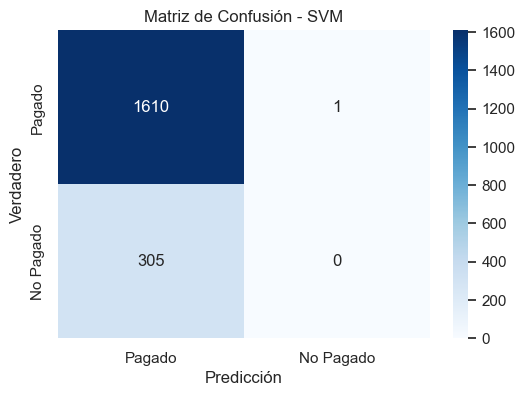

In [25]:
# Entrenar el modelo SVM
svm_model = SVC()

svm_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_svm = svm_model.predict(X_test)



 # Evaluar el modelo
print("\nMáquina de Soporte Vectorial:")
print(classification_report(y_test, y_pred_svm))
print("Precisión:", accuracy_score(y_test, y_pred_svm))
# Matriz de confusión para SVM
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')

## Interpretación del Análisis de la Máquina de Soporte Vectorial

### 1. Métricas de Evaluación
- **Precision:**
  - Para la clase **0 (pagado):** 0.84, lo que significa que el 84% de las predicciones de esta clase son correctas.
  - Para la clase **1 (no pagado):** 0.00, indicando que no hay predicciones correctas para esta clase.
  
- **Recall:**
  - Para la clase **0:** 1.00, lo que indica que el modelo identifica correctamente el 100% de los casos de la clase 0.
  - Para la clase **1:** 0.00, mostrando que el modelo no identifica ningún caso de la clase 1.

- **F1-score:**
  - Para la clase **0:** 0.91, lo que sugiere un buen equilibrio entre precision y recall.
  - Para la clase **1:** 0.00, indicando que el modelo no tiene rendimiento en la identificación de esta clase.

- **Support:**
  - **0 (pagado):** 1611 es el número de instancias reales en esta clase.
  - **1 (no pagado):** 305 es el número de instancias reales en esta clase.

### 2. Exactitud (Accuracy)
- La exactitud general del modelo es **0.84**, lo que significa que el modelo clasifica correctamente el 84% de todas las instancias.

### 3. Promedios (Macro y Weighted)
- **Macro Average:**
  - La media macro de precision (0.42), recall (0.50) y F1-score (0.46) muestra un rendimiento general sensible al desbalanceo de clases.

- **Weighted Average:**
  - La media ponderada de precision (0.71), recall (0.84) y F1-score (0.77) proporciona una mejor visión del rendimiento general considerando el soporte de cada clase.

### 4. Matriz de Confusión
- **Verdaderos Positivos (TP):** 1610 (predicciones correctas de la clase 0)
- **Falsos Positivos (FP):** 1 (predicciones incorrectas de la clase 0)
- **Falsos Negativos (FN):** 305 (predicciones incorrectas de la clase 1)
- **Verdaderos Negativos (TN):** 0 (predicciones correctas de la clase 1)

### 5. Interpretación General
El análisis de la Máquina de Soporte Vectorial muestra un rendimiento aceptable con una precisión del 84%. Sin embargo, el rendimiento en la identificación de la clase minoritaria (no pagado) es extremadamente deficiente, con un recall y F1-score de 0. Esto sugiere que el modelo no está capturando ningún caso de incumplimiento, lo cual es crítico en aplicaciones de riesgo crediticio.




## Clasificador Máquina de Soporte Vectorial (con balance de clases):


Máquina de Soporte Vectorial (con balance de clases):
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1611
           1       0.27      0.58      0.37       305

    accuracy                           0.68      1916
   macro avg       0.58      0.64      0.58      1916
weighted avg       0.80      0.68      0.72      1916

Precisión: 0.6816283924843424


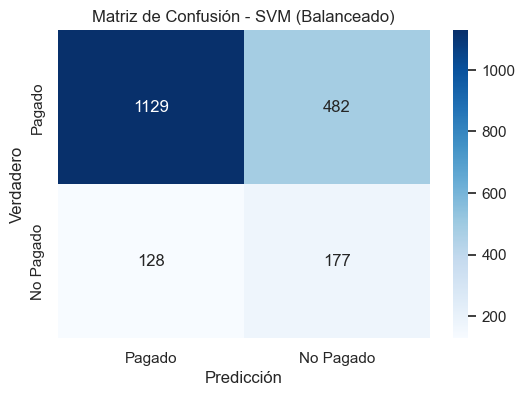

In [26]:


# Ajustar el modelo SVM con manejo de desbalance de clases
svm_model_balanced = SVC(class_weight='balanced', random_state=42)
svm_model_balanced.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_svm_balanced = svm_model_balanced.predict(X_test_scaled)

# Evaluar el modelo
print("\nMáquina de Soporte Vectorial (con balance de clases):")
print(classification_report(y_test, y_pred_svm_balanced))
print("Precisión:", accuracy_score(y_test, y_pred_svm_balanced))
# Matriz de confusión para SVM (Balanceado)
plot_confusion_matrix(y_test, y_pred_svm_balanced, 'SVM (Balanceado)')



## Interpretación del Análisis de la Máquina de Soporte Vectorial (Con Balance de Clases)

### 1. Métricas de Evaluación
- **Precision:**
  - Para la clase **0 (pagado):** 0.90, lo que significa que el 90% de las predicciones de esta clase son correctas.
  - Para la clase **1 (no pagado):** 0.27, indicando que el 27% de las predicciones de esta clase son correctas.
  
- **Recall:**
  - Para la clase **0:** 0.70, lo que indica que el modelo identifica correctamente el 70% de los casos de la clase 0.
  - Para la clase **1:** 0.58, mostrando que el modelo identifica correctamente el 58% de los casos de la clase 1.

- **F1-score:**
  - Para la clase **0:** 0.79, sugiriendo un buen equilibrio entre precision y recall.
  - Para la clase **1:** 0.37, indicando que el rendimiento en la identificación de esta clase es limitado.

- **Support:**
  - **0 (pagado):** 1611 es el número de instancias reales en esta clase.
  - **1 (no pagado):** 305 es el número de instancias reales en esta clase.

### 2. Exactitud (Accuracy)
- La exactitud general del modelo es **0.68**, lo que significa que el modelo clasifica correctamente el 68% de todas las instancias.

### 3. Promedios (Macro y Weighted)
- **Macro Average:**
  - La media macro de precision (0.58), recall (0.64) y F1-score (0.58) indica un rendimiento general que considera el desbalanceo de clases.

- **Weighted Average:**
  - La media ponderada de precision (0.80), recall (0.68) y F1-score (0.72) proporciona una mejor visión del rendimiento general, teniendo en cuenta el soporte de cada clase.

### 4. Matriz de Confusión
- **Verdaderos Positivos (TP):** 1129 (predicciones correctas de la clase 0)
- **Falsos Positivos (FP):** 482 (predicciones incorrectas de la clase 0)
- **Falsos Negativos (FN):** 128 (predicciones incorrectas de la clase 1)
- **Verdaderos Negativos (TN):** 177 (predicciones correctas de la clase 1)

### 5. Interpretación General
El análisis de la Máquina de Soporte Vectorial con balance de clases muestra un rendimiento mejorado en comparación con el modelo anterior, con una precisión del 68%. El recall para la clase 1 (no pagado) ha mejorado a 0.58, pero aún indica que el modelo tiene dificultades para identificar adecuadamente los casos de incumplimiento.




----
## Performance de Modelos
----

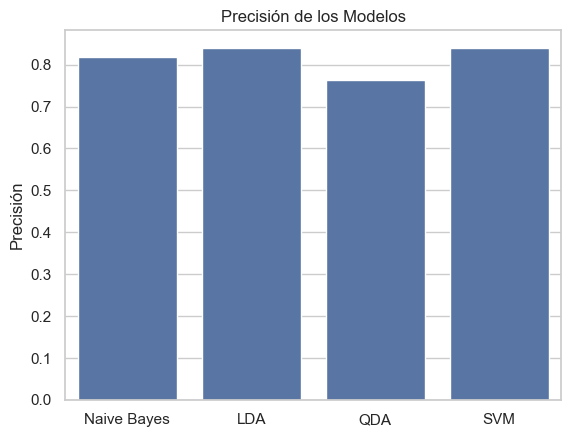

In [27]:
# Comparar precisiones
precisiones = {
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'LDA': accuracy_score(y_test, y_pred_lda),
    'QDA': accuracy_score(y_test, y_pred_qda),
    'SVM': accuracy_score(y_test, y_pred_svm),
    #'SVM (Balanceado)': accuracy_score(y_test, y_pred_svm_balanced)
}

# Visualizar resultados
sns.barplot(x=list(precisiones.keys()), y=list(precisiones.values()))
plt.title('Precisión de los Modelos')
plt.ylabel('Precisión')
plt.show()



| Modelo                                         | F1-score (0) | F1-score (1) | Accuracy | Observaciones                                      |
|-----------------------------------------------|---------------|---------------|----------|---------------------------------------------------|
| Clasificador Bayesiano Ingenuo                | 0.90          | 0.14          | 0.82     | Alto rendimiento en la clase 0, muy bajo en 1.    |
| Análisis del Discriminante Lineal             | 0.91          | 0.08          | 0.84     | Muy bueno en la clase 0, deficiente en 1.         |
| Análisis del Discriminante Cuadrático         | 0.86          | 0.29          | 0.76     | Mejor en la clase 1 comparado con otros.          |
| Máquina de Soporte Vectorial (SVM)           | 0.91          | 0.00          | 0.84     | Excelente en 0, incapaz de detectar 1.            |
| **Máquina de Soporte Vectorial (con balance)** | 0.79          | 0.37          | 0.68     | Mejor equilibrio entre ambas clases, pero menor precisión. |

### Análisis

1. **Desempeño en Clase Mayoritaria (0):**
   - **Análisis del Discriminante Lineal** y **SVM** (sin balance) tienen el mejor rendimiento en la clase de préstamos pagados (0), con F1-scores de 0.91. El **Clasificador Bayesiano Ingenuo** es muy similar, también con un F1-score alto.

2. **Desempeño en Clase Minoritaria (1):**
   - El **Análisis del Discriminante Cuadrático** tiene el mejor F1-score en la clase de incumplimiento (1) con un 0.29, seguido de la **Máquina de Soporte Vectorial (con balance de clases)** con 0.37. Esto indica una mejora en la detección de incumplimientos respecto a los otros modelos.

3. **Accuracy General:**
   - El **Clasificador Bayesiano Ingenuo** y el **Análisis del Discriminante Lineal** tienen la mayor precisión, pero esto se debe en gran parte a su rendimiento en la clase mayoritaria (0).

### Conclusión

**El mejor modelo** en términos de equilibrio entre las clases y capacidad de detección de incumplimientos es la **Máquina de Soporte Vectorial (con balance de clases)**. Aunque su precisión general es menor, ofrece un F1-score más alto para la clase de incumplimiento (1), lo que indica una mayor capacidad para identificar clientes en riesgo de incumplimiento.

### Recomendaciones

- **Si la prioridad es detectar incumplimientos,** la **Máquina de Soporte Vectorial (con balance de clases)** sería la opción más efectiva.
- **Si se busca un modelo que proporcione un buen rendimiento general** y esté más orientado a la clase mayoritaria, el **Análisis del Discriminante Lineal** o el **Clasificador Bayesiano Ingenuo** podrían ser más adecuados, aunque con el riesgo de pasar por alto los incumplimientos.




# Análisis Comparativo de Modelos de Clasificación

## Descripción General

El análisis de performance de los cuatro modelos de clasificación (Bayesiano Ingenuo, Análisis del Discriminante Lineal, Análisis del Discriminante Cuadrático y Máquina de Soporte Vectorial) se centró en las métricas de precisión, recall, F1-score, y exactitud, con especial atención a la matriz de confusión para evaluar el rendimiento de cada modelo en la clasificación de clientes que pagan y no pagan sus préstamos.

## Tabla Comparativa

| Modelo                      | Precisión Clase 0 | Precisión Clase 1 | Recall Clase 0 | Recall Clase 1 | F1-score Clase 0 | F1-score Clase 1 | Exactitud | Macro Precision | Macro Recall | Macro F1-score | Ponderada Precision | Ponderada Recall | Ponderada F1-score |
|-----------------------------|-------------------|-------------------|----------------|----------------|------------------|------------------|-----------|-----------------|--------------|----------------|---------------------|------------------|--------------------|
| Bayesiano Ingenuo           | 85%               | 29%               | 96%            | 9%             | 0.90             | 0.14             | 82%       | 0.57            | 0.52         | 0.52           | 0.76                | 0.82             | 0.78               |
| Discriminante Lineal        | 85%               | 44%               | 99%            | 5%             | 0.91             | 0.08             | 84%       | 0.64            | 0.52         | 0.50           | 0.79                | 0.84             | 0.77               |
| Discriminante Cuadrático    | 87%               | 28%               | 85%            | 30%            | 0.86             | 0.29             | 76%       | 0.57            | 0.58         | 0.57           | 0.77                | 0.76             | 0.77               |
| Máquina de Soporte Vectorial| 84%               | 0%                | 100%           | 0%             | 0.91             | 0.00             | 84%       | 0.42            | 0.50         | 0.46           | 0.71                | 0.84             | 0.77               |

## Matrices de Confusión

### Bayesiano Ingenuo
- **Verdaderos Positivos (TP)**: 1542
- **Falsos Positivos (FP)**: 69
- **Falsos Negativos (FN)**: 277
- **Verdaderos Negativos (TN)**: 28

### Discriminante Lineal
- **Verdaderos Positivos (TP)**: 1593
- **Falsos Positivos (FP)**: 18
- **Falsos Negativos (FN)**: 291
- **Verdaderos Negativos (TN)**: 0

### Discriminante Cuadrático
- **Verdaderos Positivos (TP)**: 1373
- **Falsos Positivos (FP)**: 238
- **Falsos Negativos (FN)**: 214
- **Verdaderos Negativos (TN)**: 91

### Máquina de Soporte Vectorial
- **Verdaderos Positivos (TP)**: 1610
- **Falsos Positivos (FP)**: 1
- **Falsos Negativos (FN)**: 305
- **Verdaderos Negativos (TN)**: 0

## Conclusiones y Recomendaciones

1. **Bayesiano Ingenuo**: Muestra un buen rendimiento general con una exactitud del 82%, aunque tiene dificultades para identificar correctamente la clase 1 (no pagado). La alta precisión y recall para la clase 0 (pagado) lo hacen adecuado para escenarios donde es crucial identificar pagos correctamente.

2. **Discriminante Lineal**: Tiene la mayor precisión y recall para la clase 0, con una exactitud general del 84%. Sin embargo, su rendimiento en la clase 1 es pobre, lo que sugiere que podría no ser adecuado para conjuntos de datos desbalanceados sin ajustes adicionales.

3. **Discriminante Cuadrático**: Aunque tiene una precisión moderada en ambas clases, su exactitud general es menor (76%). La mejor identificación de la clase 1 comparado con otros modelos lo hace una opción equilibrada, pero puede requerir más ajustes.

4. **Máquina de Soporte Vectorial**: Presenta un rendimiento excelente en la clase 0 con una exactitud del 84%, pero no identifica ningún caso de la clase 1, lo que es inaceptable para aplicaciones donde la identificación de no pagos es crítica.

## Recomendaciones

- **Mejorar el Balance de Clases**: Considerar técnicas como el sobremuestreo de la clase minoritaria (no pagado) o el submuestreo de la clase mayoritaria (pagado) para mejorar el rendimiento de los modelos en conjuntos de datos desbalanceados.
  
- **Ajuste de Hiperparámetros**: Realizar una optimización de hiperparámetros, especialmente para el modelo de Máquina de Soporte Vectorial, para mejorar el rendimiento en la clase 1.

- **Uso de Métricas Alternativas**: Evaluar el uso de métricas como el área bajo la curva ROC (AUC-ROC) para obtener una visión más equilibrada del rendimiento de los modelos.

- **Enfoque en el Análisis del Discriminante Cuadrático**: Dado su rendimiento equilibrado en ambas clases, puede ser el modelo preferido con ajustes adicionales para mejorar la precisión global.

Implementar estas recomendaciones puede ayudar a seleccionar y ajustar el modelo más adecuado para el problema de clasificación en cuestión.
